In [ ]:
#!pip3 install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu116

In [1]:
%matplotlib inline

import glob
from platform import python_version

import matplotlib
import numpy as np
import pandas as pd
import sklearn
import torch


In [2]:
print("python version==%s" % python_version())
print("pandas==%s" % pd.__version__)
print("numpy==%s" % np.__version__)
print("sklearn==%s" % sklearn.__version__)
print("torch==%s" % torch.__version__)
print("matplotlib==%s" % matplotlib.__version__)

python version==3.7.6
pandas==1.0.1
numpy==1.18.1
sklearn==0.22.1
torch==1.1.0
matplotlib==3.1.2


In [ ]:
###############################
#################################

## Загрузка данных

In [ ]:
# # преобразование даты в строку в цикле
# from datetime import timedelta, date

# def daterange(start_date, end_date):
#     for n in range(int ((end_date - start_date).days)):
#         yield start_date + timedelta(n)
# date_l=[]
# start_date = date(2023, 1,30)
# end_date = date(2023, 2, 10)
# for single_date in daterange(start_date, end_date):
#     #print(single_date.strftime("%Y%m%d"))
#     date_l.append(single_date.strftime("%Y%m%d"))
# print(date_l)

In [ ]:
# df['column_name']. dt.strftime('%Y-%m-%d')

In [3]:
# Загрузка всех файлов с данными
import requests 
print('Beginning file download with requests') 
date_l=range(20230321,20230324)
for file in date_l:
    destination = str(file) + '.csv.gz'
    url = 'https://s3-eu-west-1.amazonaws.com/public.bitmex.com/data/trade/' + destination
    r = requests.get(url) 
    with open( './DATA/'+destination,'wb') as f: 
        f.write(r.content) 
        # Retrieve HTTP meta-data print(r.status_code) 
        print(r.headers['content-type']) 
        print(r.encoding)


Beginning file download with requests
text/csv
ISO-8859-1
text/csv
ISO-8859-1
text/csv
ISO-8859-1


In [4]:
files = sorted(glob.glob('data/*.csv.gz'))
print(len(files))
files=files[-1500:]
files

40


['data\\20230212.csv.gz',
 'data\\20230213.csv.gz',
 'data\\20230214.csv.gz',
 'data\\20230215.csv.gz',
 'data\\20230216.csv.gz',
 'data\\20230217.csv.gz',
 'data\\20230218.csv.gz',
 'data\\20230219.csv.gz',
 'data\\20230220.csv.gz',
 'data\\20230221.csv.gz',
 'data\\20230222.csv.gz',
 'data\\20230223.csv.gz',
 'data\\20230224.csv.gz',
 'data\\20230225.csv.gz',
 'data\\20230226.csv.gz',
 'data\\20230227.csv.gz',
 'data\\20230228.csv.gz',
 'data\\20230301.csv.gz',
 'data\\20230302.csv.gz',
 'data\\20230303.csv.gz',
 'data\\20230304.csv.gz',
 'data\\20230305.csv.gz',
 'data\\20230306.csv.gz',
 'data\\20230307.csv.gz',
 'data\\20230308.csv.gz',
 'data\\20230309.csv.gz',
 'data\\20230310.csv.gz',
 'data\\20230311.csv.gz',
 'data\\20230312.csv.gz',
 'data\\20230313.csv.gz',
 'data\\20230314.csv.gz',
 'data\\20230315.csv.gz',
 'data\\20230316.csv.gz',
 'data\\20230317.csv.gz',
 'data\\20230318.csv.gz',
 'data\\20230319.csv.gz',
 'data\\20230320.csv.gz',
 'data\\20230321.csv.gz',
 'data\\2023

In [ ]:
****

In [5]:
df = pd.concat(map(pd.read_csv, files))
df.shape

(11365506, 11)

In [7]:
df = df[df.symbol == 'XBTUSD']
df.shape

(4659204, 11)

In [8]:
df.timestamp = pd.to_datetime(df.timestamp.str.replace('D', 'T'))
df = df.sort_values('timestamp')

C:\Users\1\Anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [9]:
df.set_index('timestamp', inplace=True)
df

,symbol,side,size,price,tickDirection,trdMatchID,grossValue,homeNotional,foreignNotional,trdType
timestamp,,,,,,,,,,
2023-02-12 00:00:00.478981,XBTUSD,Buy,108200,21846.5,ZeroMinusTick,b4dcebce-d666-665f-7ee3-8ff59ea7775d,495273598,4.952736,108200.0,Regular
2023-02-12 00:00:01.141403,XBTUSD,Sell,600,21846.0,MinusTick,c09ad5f0-7814-42a4-0160-ec06ef4b75f3,2746500,0.027465,600.0,Regular
2023-02-12 00:00:07.803155,XBTUSD,Sell,400,21846.0,ZeroMinusTick,f2a0cf4a-4a86-d78e-545f-62b022e7c5c8,1831000,0.018310,400.0,Regular
2023-02-12 00:00:07.803155,XBTUSD,Sell,5000,21846.0,ZeroMinusTick,cea04c8c-dbd3-6dbc-9a42-d9e750264b92,22887500,0.228875,5000.0,Regular
2023-02-12 00:00:07.803155,XBTUSD,Sell,100,21846.0,ZeroMinusTick,4beb8cb3-f513-f2b6-307b-8a8e7ba4cd7d,457750,0.004577,100.0,Regular
...,...,...,...,...,...,...,...,...,...,...
2023-03-23 23:59:55.543162,XBTUSD,Buy,600,28326.5,PlusTick,65469ae9-dee3-32d5-b5fc-481525b5ccb2,2118156,0.021182,600.0,Regular
2023-03-23 23:59:55.547796,XBTUSD,Buy,6100,28326.5,ZeroPlusTick,da46b312-2dc8-9cc8-85ef-88128a6ef28a,21534586,0.215346,6100.0,Regular
2023-03-23 23:59:55.550837,XBTUSD,Buy,800,28326.5,ZeroPlusTick,78ad646a-8e08-be5c-05b0-f225e96193e4,2824208,0.028242,800.0,Regular


In [10]:
df_vwap = df.groupby(pd.Grouper(freq="1Min")).apply(
    lambda row: pd.np.sum(row.price * row.foreignNotional) / pd.np.sum(row.foreignNotional))

df_vwap.shape

C:\Users\1\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  
C:\Users\1\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


(57600,)

In [11]:
# Мое исправление
df_vwap = df_vwap.fillna(0)
for i in range(1, len(df_vwap)):
    #print(i)
    #print(df_vwap[i-1])
    if df_vwap[i]==0:
        df_vwap[i]=df_vwap[i-1]
    
   
# #df_vwap = df_vwap.fillna(df_vwap[-1])
# #df_vwap[1]
# # for i in range(1, len(df_vwap)):
# #     print(df_vwap[i-1])

In [12]:
#С0храняем последовательность
df_vwap.to_csv('df_vwap_0323.csv')

In [14]:
df_vwap = pd.read_csv('df_vwap0211.csv', parse_dates=["timestamp"])
df_vwap1 = pd.read_csv('df_vwap_0323.csv', parse_dates=["timestamp"])
df_vwap=df_vwap.append(df_vwap1)
df_vwap.set_index('timestamp', inplace=True)
print(type(df_vwap))
df_vwap = df_vwap.squeeze()
print(type(df_vwap))
len(df_vwap)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


3956366

In [15]:
#Сохраняем последовательность
df_vwap.to_csv('df_vwap0323.csv')

In [ ]:
#################################################
##################################################

In [22]:
#Загрузка основного массива
df_vwap = pd.read_csv('df_vwap0323.csv', parse_dates=["timestamp"])
df_vwap.set_index('timestamp', inplace=True)
df_vwap = df_vwap.squeeze()

In [ ]:
#Загрузка Прогнозного массива
df_vwap1 = pd.read_csv('df_vwap_0323.csv', parse_dates=["timestamp"])
df_vwap1.set_index('timestamp', inplace=True)
df_vwap1 = df_vwap1.squeeze()

In [23]:
df_vwap

timestamp
2015-09-25 12:35:00      239.990000
2015-09-25 12:36:00      239.990000
2015-09-25 12:37:00      237.430000
2015-09-25 12:38:00      237.400001
2015-09-25 12:39:00      237.400001
                           ...     
2023-03-23 23:55:00    28368.648452
2023-03-23 23:56:00    28345.503415
2023-03-23 23:57:00    28341.653833
2023-03-23 23:58:00    28339.960674
2023-03-23 23:59:00    28329.670925
Name: 0, Length: 3956365, dtype: float64

In [26]:
df_vwap=df_vwap[::5]

In [27]:
df_vwap

timestamp
2015-09-25 12:35:00      239.990000
2015-09-25 12:40:00      237.400001
2015-09-25 12:45:00      237.460000
2015-09-25 12:50:00      237.382513
2015-09-25 12:55:00      237.382513
                           ...     
2023-03-23 23:35:00    28414.467966
2023-03-23 23:40:00    28380.661157
2023-03-23 23:45:00    28317.829277
2023-03-23 23:50:00    28340.813953
2023-03-23 23:55:00    28368.648452
Name: 0, Length: 791273, dtype: float64

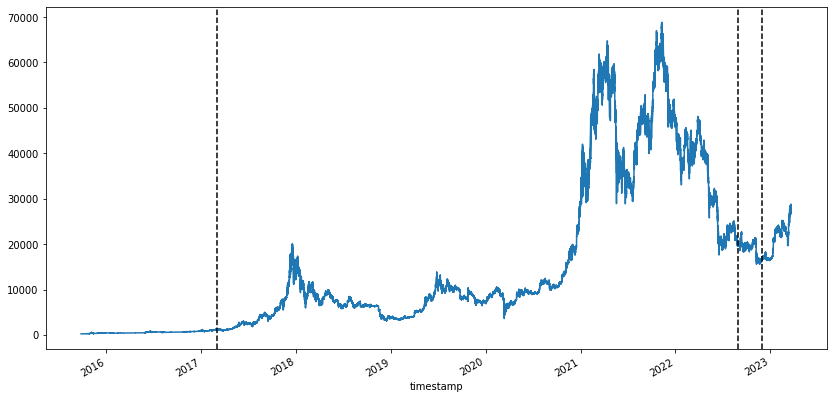

In [28]:
ax = df_vwap.plot(figsize=(14, 7))
ax.axvline("2017-03-01", linestyle="--", c="black")
ax.axvline("2022-09-01", linestyle="--", c="black")
ax.axvline("2022-12-01", linestyle="--", c="black")

In [29]:
df_train =df_vwap[(df_vwap.index >= "2015-02-06") & (df_vwap.index < "2023-03-24")].to_frame(name="vwap")
df_train.shape

(791273, 1)

In [31]:
df_val = df_vwap[(df_vwap.index >= "2023-01-01") & (df_vwap.index < "2023-03-01")].to_frame(name="vwap")
df_val.shape

(16992, 1)

In [35]:
#df_test =df_vwap.to_frame(name='vwap') 
df_test=df_vwap[df_vwap.index >= "2023-03-01"].to_frame(name='vwap')
df_test.shape

(6624, 1)

In [ ]:
df_test



In [ ]:
# df_vwap1 = pd.read_csv('df_vwap10_tek.csv', parse_dates=["timestamp"])
# df_vwap1.set_index('timestamp', inplace=True)
# df_vwap1 = df_vwap1.squeeze()
# df_test1=df_vwap1.to_frame(name='vwap')                     
# df_test=df_test.append(df_test1)
# df_test.shape

In [ ]:
#df_test


In [36]:
#преобразование данных
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_arr = scaler.fit_transform(df_train)
val_arr = scaler.transform(df_val)
test_arr = scaler.transform(df_test)

In [37]:
def transform_data(arr, seq_len):
    x, y = [], []
    for i in range(len(arr) - seq_len):
        x_i = arr[i : i + seq_len]
        y_i = arr[i + 1 : i + seq_len + 1]
        x.append(x_i)
        y.append(y_i)
    x_arr = np.array(x).reshape(-1, seq_len)
    y_arr = np.array(y).reshape(-1, seq_len)
    x_var = Variable(torch.from_numpy(x_arr).float())
    y_var = Variable(torch.from_numpy(y_arr).float())
    return x_var, y_var

In [38]:
from torch.autograd import Variable

seq_len = 100

x_train, y_train = transform_data(train_arr, seq_len)
x_val, y_val = transform_data(val_arr, seq_len)
x_test, y_test = transform_data(test_arr, seq_len)

In [39]:
def plot_sequence(axes, i, x_train, y_train):
    axes[i].set_title("%d. Sequence" % (i + 1))
    axes[i].set_xlabel("Time Bars")
    axes[i].set_ylabel("Scaled VWAP")
    axes[i].plot(range(seq_len), x_train[i].cpu().numpy(), color="r", label="Feature")
    axes[i].plot(range(1, seq_len + 1), y_train[i].cpu().numpy(), color="b", label="Target")
    axes[i].legend()

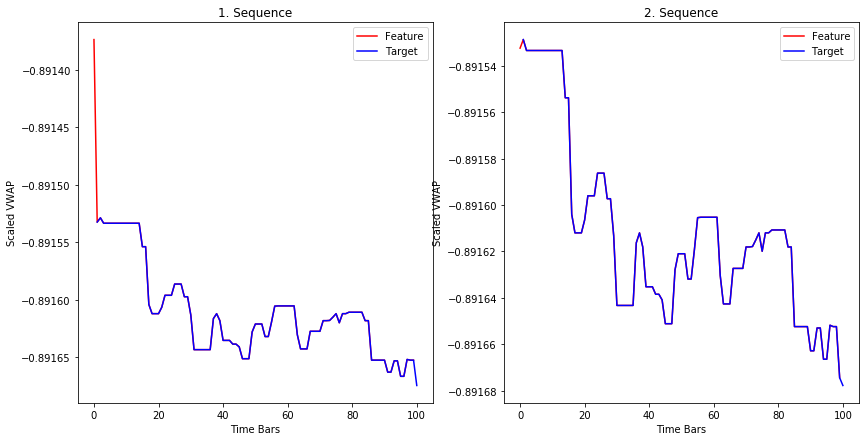

In [40]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))
plot_sequence(axes, 0, x_train, y_train)
plot_sequence(axes, 1, x_train, y_train)
#plot_sequence(axes, 2, x_train, y_train)
#plot_sequence(axes, 3, x_train, y_train)
#plot_sequence(axes, 4, x_train, y_train)

In [41]:
import torch.nn as nn
import torch.optim as optim


class Model(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Model, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.lstm = nn.LSTMCell(self.input_size, self.hidden_size)
        self.linear = nn.Linear(self.hidden_size, self.output_size)

    def forward(self, input, future=0, y=None):
        outputs = []

        # сбросить состояние LSTM
        # состояние сохраняется до конца последовательности
        h_t = torch.zeros(input.size(0), self.hidden_size, dtype=torch.float32)
        c_t = torch.zeros(input.size(0), self.hidden_size, dtype=torch.float32)

        for i, input_t in enumerate(input.chunk(input.size(1), dim=1)):
            h_t, c_t = self.lstm(input_t, (h_t, c_t))
            output = self.linear(h_t)
            outputs += [output]

        for i in range(future):
            if y is not None and random.random() > 0.5:
                output = y[:, [i]]  # teacher forcing
            h_t, c_t = self.lstm(output, (h_t, c_t))
            output = self.linear(h_t)
            outputs += [output]
        outputs = torch.stack(outputs, 1).squeeze(2)
        return outputs

In [42]:
import time
import random


class Optimization:
    """ A helper class to train, test and diagnose the LSTM"""

    def __init__(self, model, loss_fn, optimizer, scheduler):
        self.model = model
        self.loss_fn = loss_fn
        self.optimizer = optimizer
        self.scheduler = scheduler
        self.train_losses = []
        self.val_losses = []
        self.futures = []

    @staticmethod
    def generate_batch_data(x, y, batch_size):
        for batch, i in enumerate(range(0, len(x) - batch_size, batch_size)):
            x_batch = x[i : i + batch_size]
            y_batch = y[i : i + batch_size]
            yield x_batch, y_batch, batch

    def train(
        self,
        x_train,
        y_train,
        x_val=None,
        y_val=None,
        batch_size=100,
        #*******************
        n_epochs=1,
        do_teacher_forcing=None,
    ):
        seq_len = x_train.shape[1]
        for epoch in range(n_epochs):
            start_time = time.time()
            self.futures = []

            train_loss = 0
            for x_batch, y_batch, batch in self.generate_batch_data(x_train, y_train, batch_size):
                y_pred = self._predict(x_batch, y_batch, seq_len, do_teacher_forcing)
                self.optimizer.zero_grad()
                loss = self.loss_fn(y_pred, y_batch)
                loss.backward()
                self.optimizer.step()
                train_loss += loss.item()
            self.scheduler.step()
            train_loss /= batch
            self.train_losses.append(train_loss)

            self._validation(x_val, y_val, batch_size)

            elapsed = time.time() - start_time
            print(
                "Epoch %d Train loss: %.2f. Validation loss: %.2f. Avg future: %.2f. Elapsed time: %.2fs."
                % (epoch + 1, train_loss, self.val_losses[-1], np.average(self.futures), elapsed)
            )

    def _predict(self, x_batch, y_batch, seq_len, do_teacher_forcing):
        if do_teacher_forcing:
            future = random.randint(1, int(seq_len) / 2)
            limit = x_batch.size(1) - future
            y_pred = self.model(x_batch[:, :limit], future=future, y=y_batch[:, limit:])
        else:
            future = 0
            y_pred = self.model(x_batch)
        self.futures.append(future)
        return y_pred

    def _validation(self, x_val, y_val, batch_size):
        if x_val is None or y_val is None:
            return
        with torch.no_grad():
            val_loss = 0
            for x_batch, y_batch, batch in self.generate_batch_data(x_val, y_val, batch_size):
                y_pred = self.model(x_batch)
                loss = self.loss_fn(y_pred, y_batch)
                val_loss += loss.item()
            val_loss /= batch
            self.val_losses.append(val_loss)

    def evaluate(self, x_test, y_test, batch_size, future=1):
        with torch.no_grad():
            test_loss = 0
            actual, predicted = [], []
            for x_batch, y_batch, batch in self.generate_batch_data(x_test, y_test, batch_size):
                y_pred = self.model(x_batch, future=future)
                y_pred = (
                    y_pred[:, -len(y_batch) :] if y_pred.shape[1] > y_batch.shape[1] else y_pred
                )
                loss = self.loss_fn(y_pred, y_batch)
                test_loss += loss.item()
                actual += torch.squeeze(y_batch[:, -1]).data.cpu().numpy().tolist()
                predicted += torch.squeeze(y_pred[:, -1]).data.cpu().numpy().tolist()
            test_loss /= batch
            return actual, predicted, test_loss

    def plot_losses(self):
        plt.plot(self.train_losses, label="Training loss")
        plt.plot(self.val_losses, label="Validation loss")
        plt.legend()
        plt.title("Losses")

In [43]:
def generate_sequence(scaler, model, x_sample, future=1000):
    """ Generate future values for x_sample with the model """
    y_pred_tensor = model(x_sample, future=future)
    y_pred = y_pred_tensor.cpu().tolist()
    y_pred = scaler.inverse_transform(y_pred)
    return y_pred

In [44]:
def to_dataframe(actual, predicted):
    return pd.DataFrame({"actual": actual, "predicted": predicted})


def inverse_transform(scalar, df, columns):
    for col in columns:
        df[col] = scaler.inverse_transform(df[col])
    return df

In [45]:
model_1 = Model(input_size=1, hidden_size=21, output_size=1)
loss_fn_1 = nn.MSELoss()
optimizer_1 = optim.Adam(model_1.parameters(), lr=1e-3)
scheduler_1 = optim.lr_scheduler.StepLR(optimizer_1, step_size=5, gamma=0.1)
optimization_1 = Optimization(model_1, loss_fn_1, optimizer_1, scheduler_1)

In [46]:
# dev = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
# model_1.to(dev) # is on cuda (all parameters)
# dev

In [48]:
# PATH = './model10_0902.pth'
# #model_1 = Model(input_size=1, hidden_size=21, output_size=1)
# model_1.load_state_dict(torch.load(PATH))

In [ ]:
optimization_1.train(x_train, y_train, x_val, y_val, do_teacher_forcing=False)

In [ ]:
optimization_1.plot_losses()

In [ ]:
actual_1, predicted_1, test_loss_1 = optimization_1.evaluate(x_test, y_test, future=5, batch_size=100)
df_result_1 = to_dataframe(actual_1, predicted_1) 
df_result_1 = inverse_transform(scaler, df_result_1, ['actual', 'predicted'])
df_result_1.plot(figsize=(14, 7))
print("Test loss %.4f" % test_loss_1)

In [ ]:
df_result_1
df_result_1.iloc[:].to_csv('df_result_1000.csv')

In [ ]:
df_result_1

In [ ]:
actual_1, predicted_1, test_loss_1 = optimization_1.evaluate(x_train, y_train, future=5, batch_size=100)
df_result_1 = to_dataframe(actual_1, predicted_1) 
df_result_1 = inverse_transform(scaler, df_result_1, ['actual', 'predicted'])
df_result_1.plot(figsize=(14, 7))
print("Test loss %.4f" % test_loss_1)

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))
df_result_1.iloc[0:30].plot(ax=axes[0], figsize=(14, 7))
df_result_1.iloc[-10:].plot(ax=axes[1], figsize=(14, 7))
axes[1].grid(1)

In [ ]:
# PATH = './model10_0902.pth'
# torch.save(model_1.state_dict(), PATH)

In [ ]:
df_result_1

#df_vwap.to_csv('df_result_1.csv')
df_result_1.iloc[-140:].to_csv('df_result_140.csv')

## реальное прогнозирование
подготовка последовательности

In [ ]:
df_test = df_vwap[df_vwap.index >= "2023-01-31"].to_frame(name='vwap')
df_test.shape

In [ ]:
x_sample = x_test[0].reshape(1, -1)
y_sample = df_test.vwap[:1100]
 
y_pred1 = generate_sequence(scaler, optimization_1.model, x_sample)

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(range(100), y_pred1[0][:100], color="blue", lw=2, label="Predicted VWAP")
plt.plot(range(100, 1100), y_pred1[0][100:], "--", color="blue", lw=2, label="Generated VWAP")
plt.plot(range(0, 1100), y_sample, color="red", label="Actual VWAP")
plt.legend()

In [ ]:
model_2 = Model(input_size=1, hidden_size=21, output_size=1)
loss_fn_2 = nn.MSELoss()
optimizer_2 = optim.Adam(model_2.parameters(), lr=1e-3)
scheduler_2 = optim.lr_scheduler.StepLR(optimizer_2, step_size=5, gamma=0.1)
optimization_2 = Optimization(model_2, loss_fn_2,  optimizer_2, scheduler_2)

In [ ]:
#optimization_2.train(x_train, y_train, x_val, y_val, do_teacher_forcing=True)

In [ ]:
optimization_2.plot_losses()

In [ ]:
actual_2, predicted_2, test_loss_2 = optimization_2.evaluate(x_test, y_test, batch_size=100, future=5)
df_result_2 = to_dataframe(actual_2, predicted_2)
df_result_2 = inverse_transform(scaler, df_result_2, ["actual", "predicted"])
df_result_2.plot(figsize=(14, 7))
print("Test loss %.4f" % test_loss_2)

In [ ]:
PATH = './model_0302.pth'
torch.save(model_2.state_dict(), PATH)

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(range(100), y_pred1[0][:100], color="blue", lw=2, label="Predicted VWAP")
plt.plot(range(100, 1100), y_pred1[0][100:], "--", color="blue", lw=2, label="Generated VWAP")
plt.plot(range(0, 1100), y_sample, color="red", label="Actual VWAP")
plt.legend()

### Обучение на ГПУ

### --------------------------------------------------------

In [ ]:
***

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)
print()

In [ ]:
model_1.to(device)

In [ ]:
x_train, y_train = data[0].to(device), data[1].to(device)

In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
    x_train, y_train = data[0].to(device), data[1].to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')